In [1]:
import csv
import pandas

path = '/Users/d062864/Documents/01_code/pythonStarter'

fileName = 'dailyCapacity.csv'

In [2]:
df = pandas.read_csv(path+'/'+fileName,
                        dtype={"salary": int},)

df.rename(columns={
    'On a scale from 1 to 10, how mentally alert do you feel right now?': 'mental',
    'On a scale from 1 to 10, how physically alert do you feel right now?': 'physical',
    'What am I doing': 'what'
}, inplace=True)

df.columns = [col.lower() for col in df]

df.dropna(subset=['mental'], inplace=True)

df.astype({'mental': 'int64'})

df['time'] = pandas.to_timedelta(df['time']+':00')

print(df)

date     time                         what  mental  physical
0   3/2/20 07:30:00     unloading the dishwasher     8.0       9.0
1   3/2/20 09:00:00                Webide Coding     9.0       8.0
2   3/2/20 10:30:00           Debugging with Nic    10.0       9.0
3   3/2/20 12:00:00              Deploying to CF     7.0       8.0
4   3/2/20 13:30:00           setting up AGL app     3.0       4.0
5   3/2/20 15:00:00      loading stuff into hana     6.0       9.0
6   3/2/20 16:30:00              database import     7.0       9.0
7   3/2/20 18:00:00                      Cooking     9.0      10.0
8   3/2/20 19:30:00                Eating dinner     7.0       7.0
9   3/2/20 21:00:00       installing door remote     8.0       6.0
10  4/2/20 07:30:00                      Reading     7.0       7.0
11  4/2/20 09:00:00               preparing demo     9.0       9.0
12  4/2/20 10:30:00                        snack     8.0       8.0
13  4/2/20 12:00:00                 earpo repair     9.0       9.0
1

In [3]:
df_mental = df[['time', 'mental', 'physical']]

df_mental_grouped = df_mental.groupby(['time']).mean()

df_mental_grouped.physical = df_mental_grouped.physical.round(1)

print(df_mental_grouped)

mental  physical
time                      
07:30:00     8.0       8.6
09:00:00     9.2       9.2
10:30:00     9.2       9.2
12:00:00     8.4       8.8
13:30:00     6.6       7.0
15:00:00     7.4       8.8
16:30:00     7.2       8.6
18:00:00     7.6       8.6
19:30:00     7.0       7.4
21:00:00     7.0       6.7


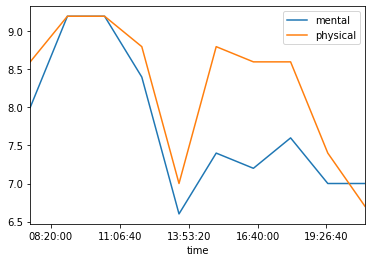

In [5]:
import matplotlib.pyplot as plt

df_mental_grouped.plot()